In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']=(8,5)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\KOWSIK.S\Data_Science\ML\Capstone\personality_dataset.csv")
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [7]:
data.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [9]:
# Define numeric and categorical columns
df_numeric_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
df_categorical_columns = ['Stage_fear', 'Drained_after_socializing']
target_column = 'Personality'

In [11]:
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(16,16))
    fig.suptitle(suptitle,y=0.92, size=16)
    axs = axs.flatten()
    
    for i,data in enumerate(columns_list):
        sns.distplot(dataset[data], ax=axs[i])
        axs[i].set_title(data + ', skewnwss is '+str(round(dataset[data].skew(axis=0,skipna=True),2)))
        
    plt.tight_layout()

    plt.show()


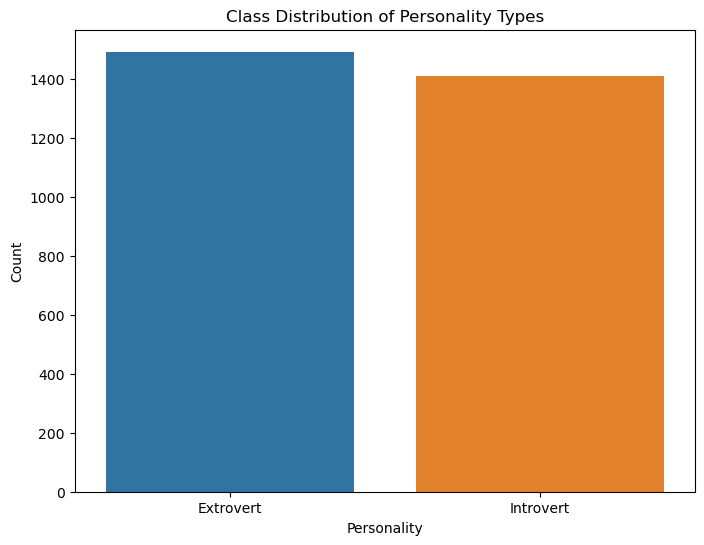

In [13]:
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Personality', data=data,hue ='Personality')
plt.title('Class Distribution of Personality Types')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.show()

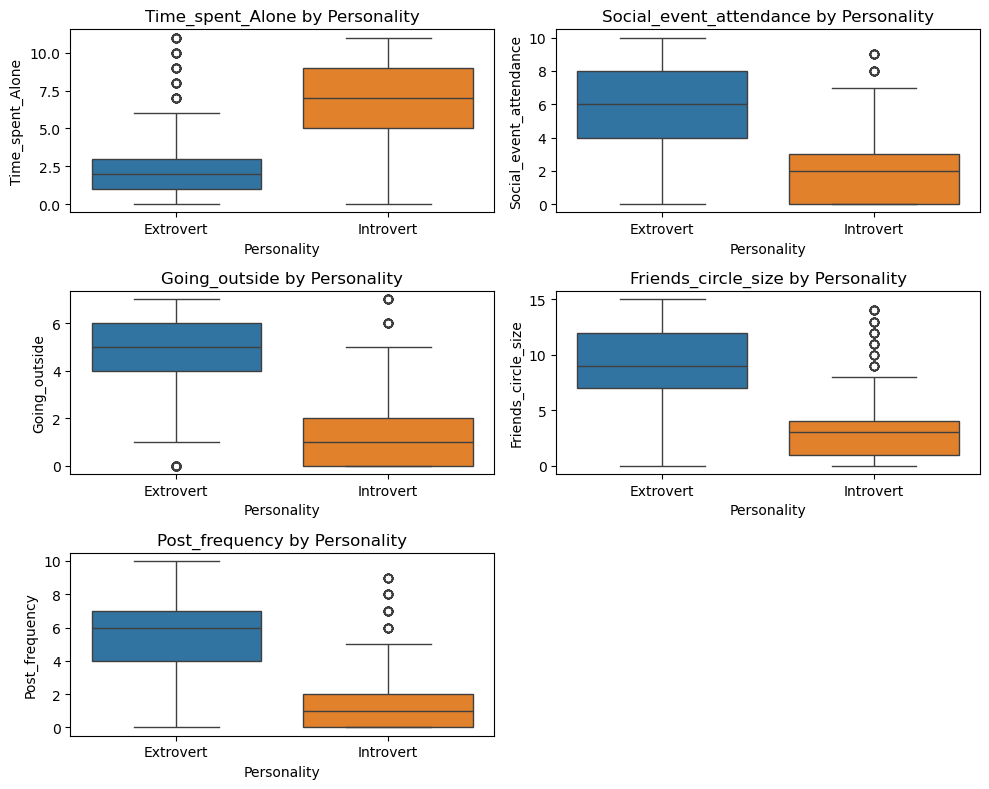

In [15]:
# Numeric feature distributions by class
plt.figure(figsize=(10, 8))

for i, col in enumerate(df_numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Personality', y=col, data=data,hue='Personality')
    plt.title(f'{col} by Personality')
plt.tight_layout()
plt.show()

In [17]:
df_clean = data.copy()
df_clean.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [19]:
# Encode categorical Yes/No features
yes_no_cols = ['Stage_fear', 'Drained_after_socializing']
for col in yes_no_cols:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0})

In [21]:
df_clean.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,Extrovert
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,Introvert
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,Introvert
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,Extrovert
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,Extrovert


In [23]:
# Encode target variable (Personality)
label_encoder = LabelEncoder()
df_clean['Personality'] = label_encoder.fit_transform(df_clean['Personality'])  # Introvert=0, Extrovert=1

In [25]:
df_clean.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,1
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,1
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,0


In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   float64
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   float64
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 170.1 KB


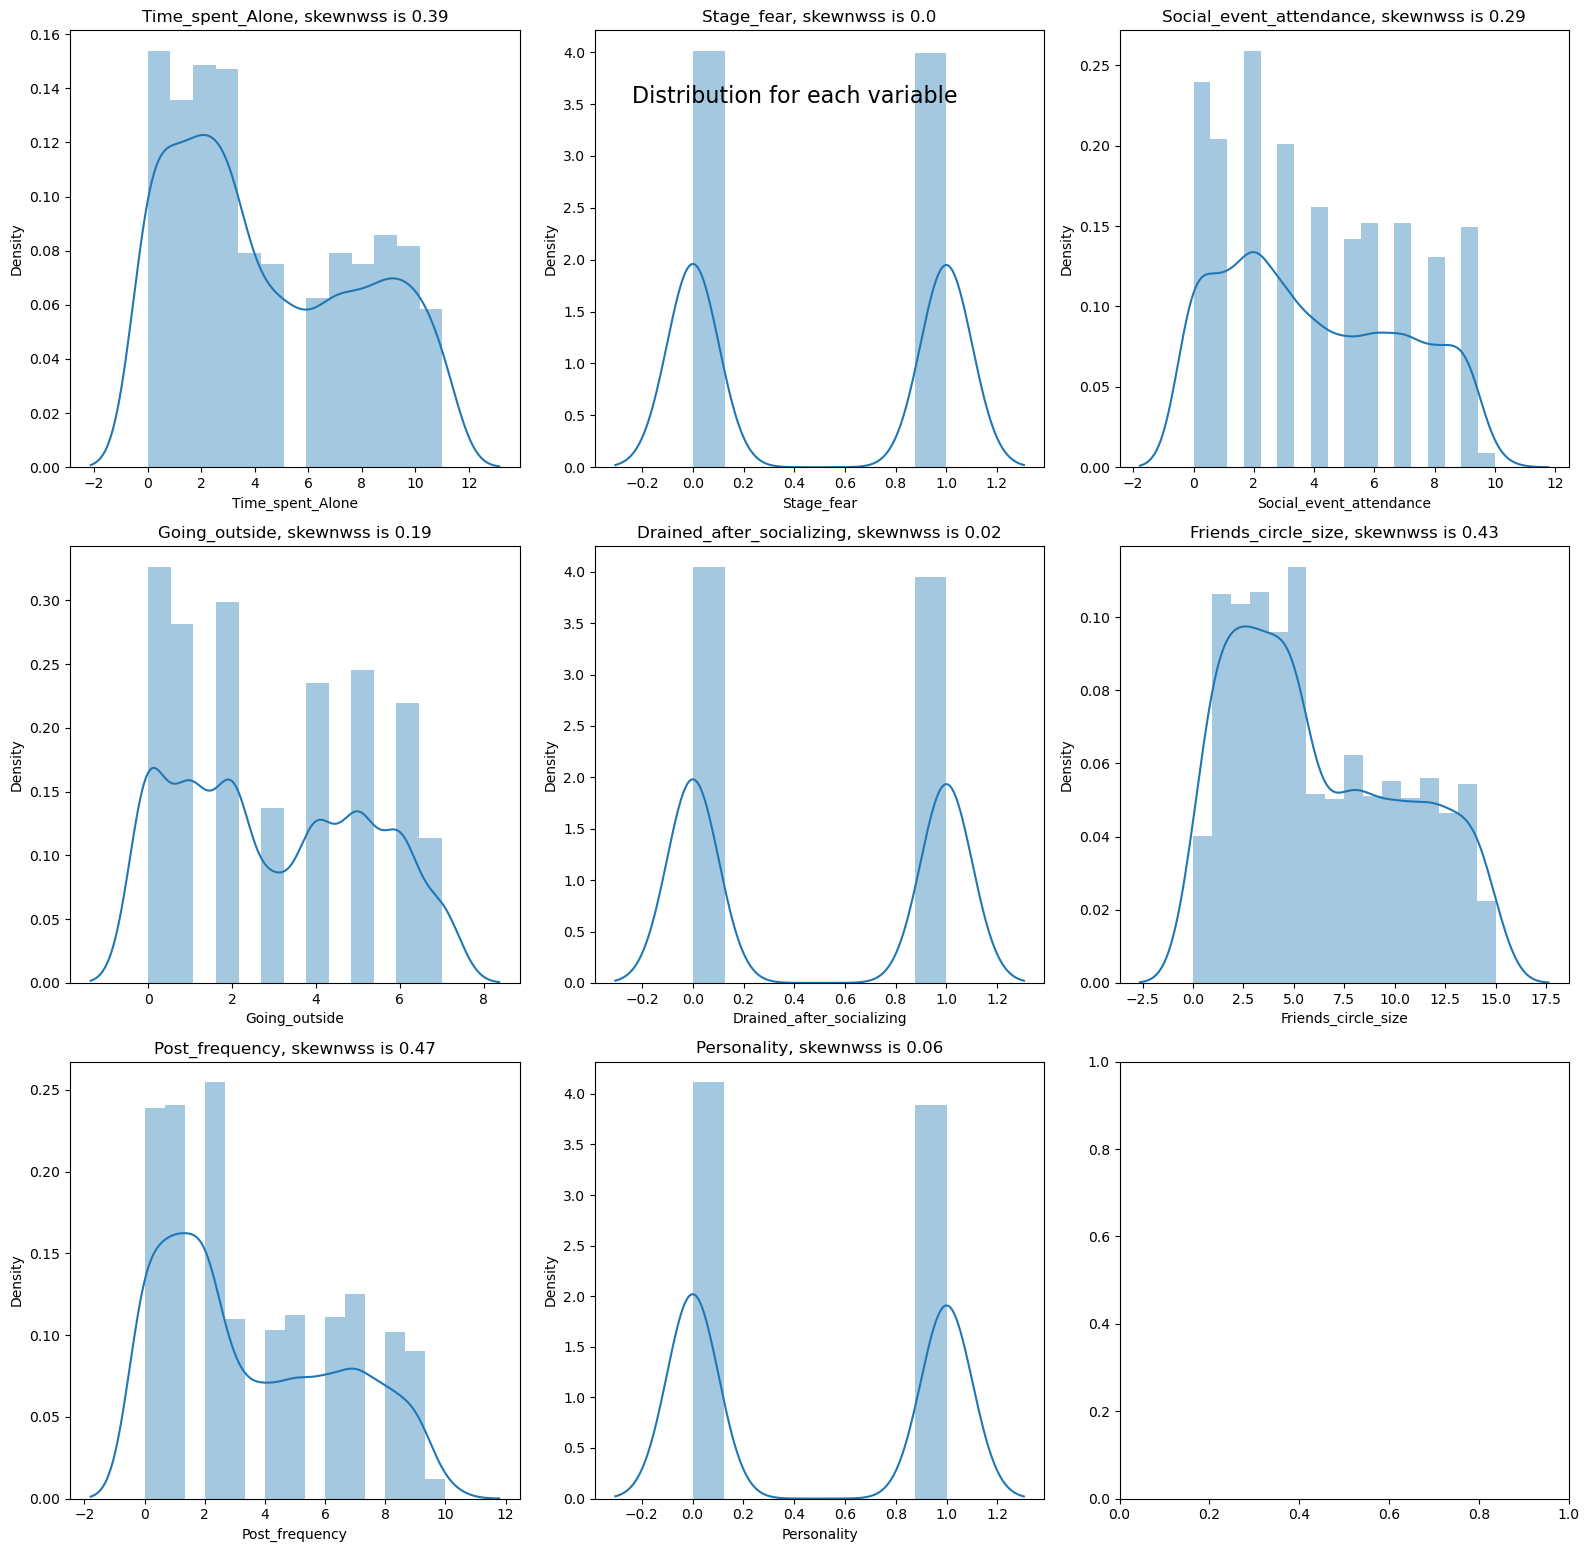

In [29]:
dist_custom(dataset=df_clean, columns_list=df_clean.columns, rows=3,cols=3,suptitle='Distribution for each variable')

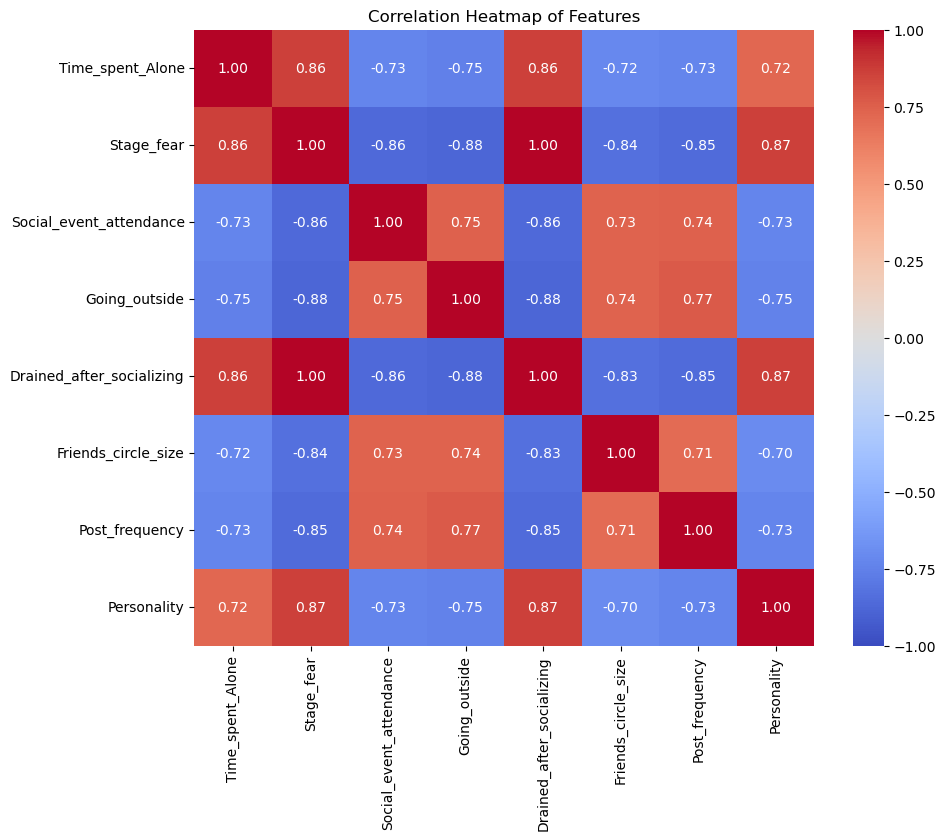

In [31]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()

In [33]:
# sort the variables on basis of total null values in the variable
# isnull().sum() returns the  umber of missing values in each variable
# Descending order to print highest number

Total=df_clean.isnull().sum().sort_values(ascending=False)

# calculate the percentage of missing values
# The values with highest value it be printed by using descending order

Percent = (df_clean.isnull().sum()*100/df_clean.isnull().count()).sort_values(ascending=False)
Dtype = df_clean.dtypes

# concat the total and percent using concat function

# keys is the list of columns names
missing_data=pd.concat([Total, Percent,Dtype], axis=1,keys=['Total Missing','Percentage of Missing Values','Data Type'])
missing_data

,Total Missing,Percentage of Missing Values,Data Type
Friends_circle_size,77,2.655172,float64
Stage_fear,73,2.517241,float64
Going_outside,66,2.275862,float64
Post_frequency,65,2.241379,float64
Time_spent_Alone,63,2.172414,float64
Social_event_attendance,62,2.137931,float64
Drained_after_socializing,52,1.793103,float64
Personality,0,0.000000,int32


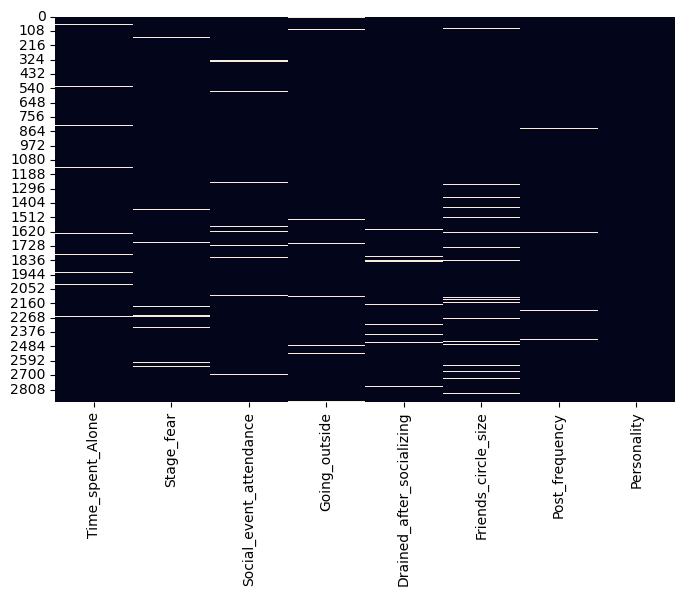

In [35]:
# plotting a heatmap to visualise the missing values for numm values
# cbar=False means does not show color axis and the vertical bar plotted to right of the heatmap
sns.heatmap(df_clean.isnull(),cbar=False)

plt.show()

In [37]:
df_clean.columns,df_clean.dtypes

(Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
        'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
        'Post_frequency', 'Personality'],
       dtype='object'),
 Time_spent_Alone             float64
 Stage_fear                   float64
 Social_event_attendance      float64
 Going_outside                float64
 Drained_after_socializing    float64
 Friends_circle_size          float64
 Post_frequency               float64
 Personality                    int32
 dtype: object)

In [39]:
cols = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
        'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
        'Post_frequency', 'Personality']

In [41]:
# Numerical Value missing treatment

def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(),2)
    max1=round(data[x].max(),2)
    mean=round(data[x].mean(),2)
    median = round(data[x].median(), 2)
    mode=data[x].mode()[0]
    var=round(data[x].var(),2)
    std=round(data[x].std(),2)
    range1=round(max1-min1,2)
    q1=round(data[x].quantile(0.25),2)
    q3=round(data[x].quantile(0.75),2)
    skew=round(data[x].skew(),2)
    kurt=round(data[x].kurt(),2)
    myvalue = {'missing':missing,'min':min1,'max':max1,'mean':mean,'median':median,'mode':mode,'var':var,'std':std,'range':range1,
               'q1':q1,'q3':q3,'skew':skew,'kurt':kurt}

    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data,y=data[x])
    plt.show()
    if(skew==0):
        print('Its a normal distribution')
    elif(skew>0):
        print('Its Positively skewed')
    else:
        print("Its negatively skewed")
        
    if(kurt==0):
        print('Its a Mesokurtic')
    elif(kurt>0):
        print('Its leptokurtic')
    else:
        print("Its pleutykurtic")
        
    return myvalue


--- Analysis for: Time_spent_Alone ---


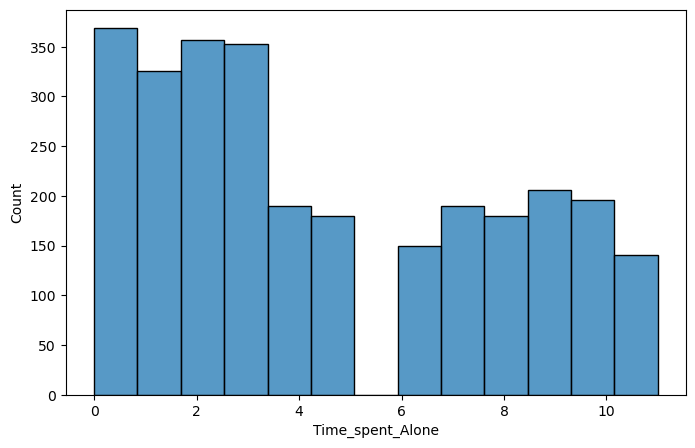

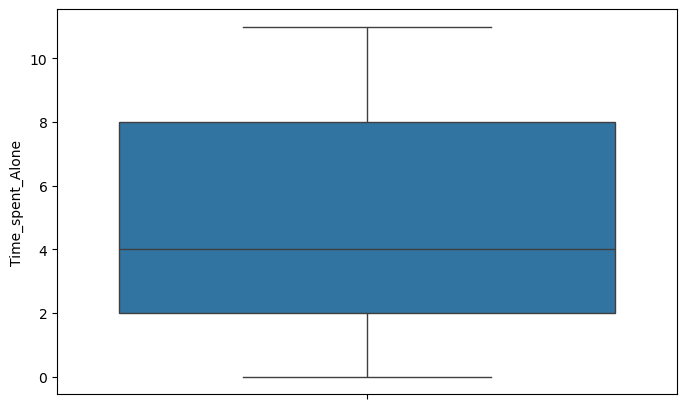

Its Positively skewed
Its pleutykurtic
{'missing': 63, 'min': 0.0, 'max': 11.0, 'mean': 4.51, 'median': 4.0, 'mode': 0.0, 'var': 12.1, 'std': 3.48, 'range': 11.0, 'q1': 2.0, 'q3': 8.0, 'skew': 0.39, 'kurt': -1.16}

--- Analysis for: Stage_fear ---


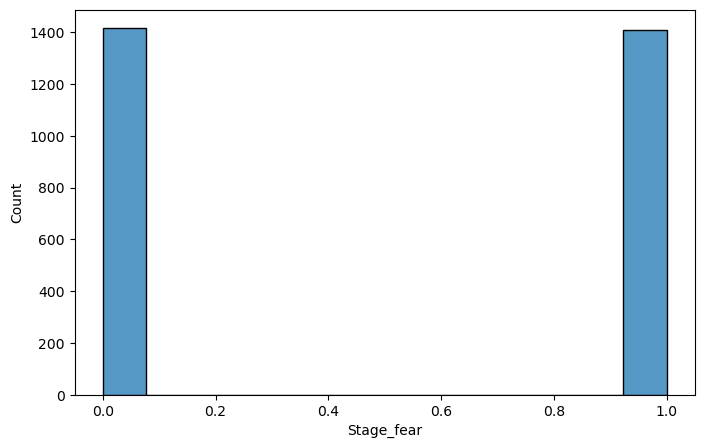

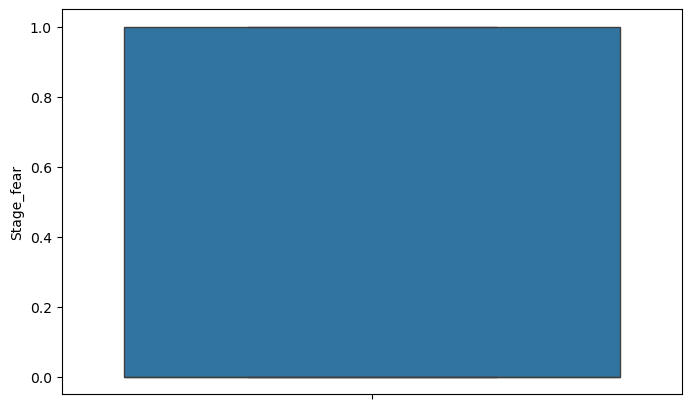

Its a normal distribution
Its pleutykurtic
{'missing': 73, 'min': 0.0, 'max': 1.0, 'mean': 0.5, 'median': 0.0, 'mode': 0.0, 'var': 0.25, 'std': 0.5, 'range': 1.0, 'q1': 0.0, 'q3': 1.0, 'skew': 0.0, 'kurt': -2.0}

--- Analysis for: Social_event_attendance ---


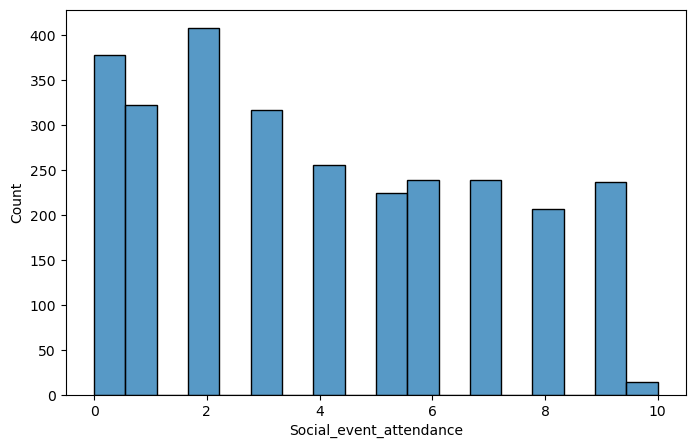

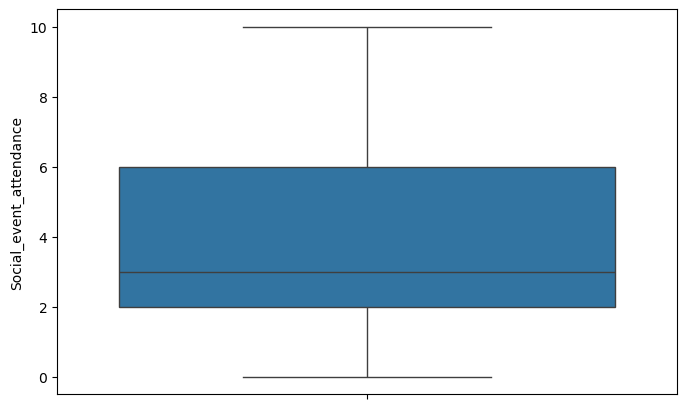

Its Positively skewed
Its pleutykurtic
{'missing': 62, 'min': 0.0, 'max': 10.0, 'mean': 3.96, 'median': 3.0, 'mode': 2.0, 'var': 8.43, 'std': 2.9, 'range': 10.0, 'q1': 2.0, 'q3': 6.0, 'skew': 0.29, 'kurt': -1.14}

--- Analysis for: Going_outside ---


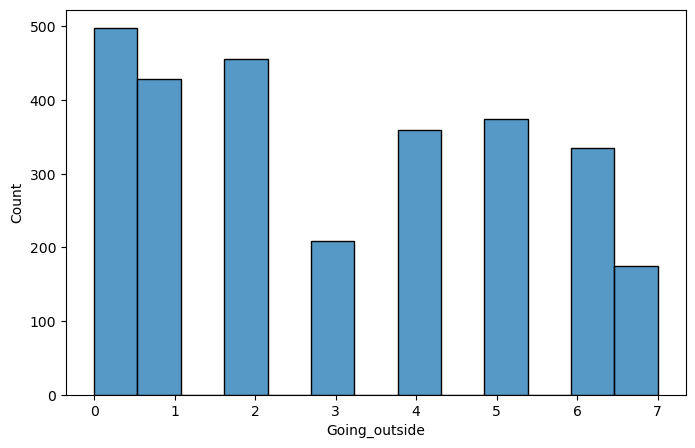

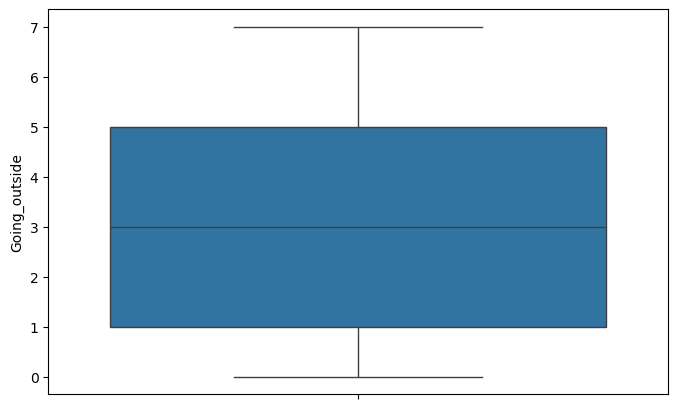

Its Positively skewed
Its pleutykurtic
{'missing': 66, 'min': 0.0, 'max': 7.0, 'mean': 3.0, 'median': 3.0, 'mode': 0.0, 'var': 5.05, 'std': 2.25, 'range': 7.0, 'q1': 1.0, 'q3': 5.0, 'skew': 0.19, 'kurt': -1.26}

--- Analysis for: Drained_after_socializing ---


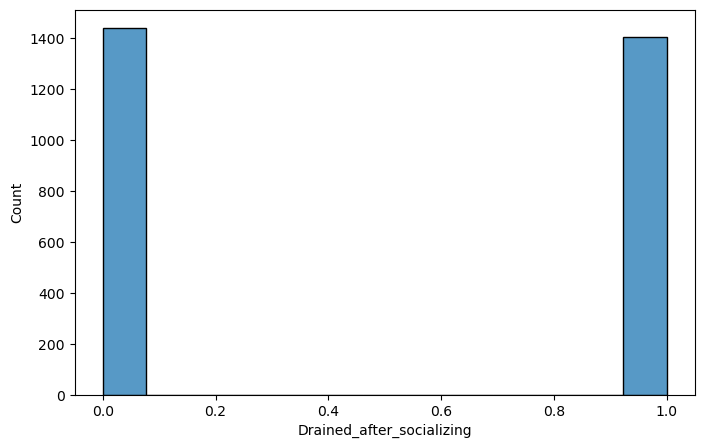

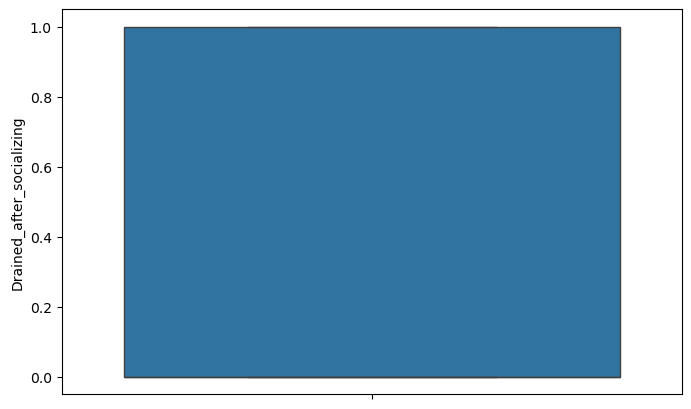

Its Positively skewed
Its pleutykurtic
{'missing': 52, 'min': 0.0, 'max': 1.0, 'mean': 0.49, 'median': 0.0, 'mode': 0.0, 'var': 0.25, 'std': 0.5, 'range': 1.0, 'q1': 0.0, 'q3': 1.0, 'skew': 0.02, 'kurt': -2.0}

--- Analysis for: Friends_circle_size ---


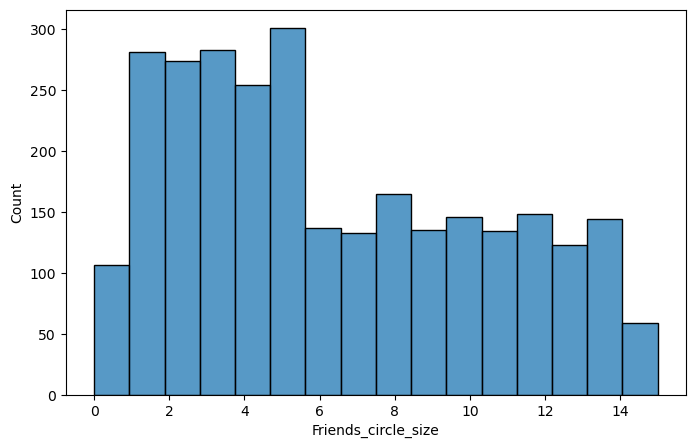

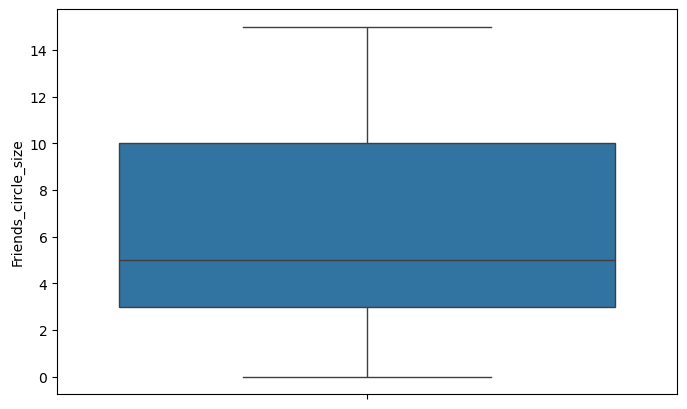

Its Positively skewed
Its pleutykurtic
{'missing': 77, 'min': 0.0, 'max': 15.0, 'mean': 6.27, 'median': 5.0, 'mode': 5.0, 'var': 18.4, 'std': 4.29, 'range': 15.0, 'q1': 3.0, 'q3': 10.0, 'skew': 0.43, 'kurt': -1.03}

--- Analysis for: Post_frequency ---


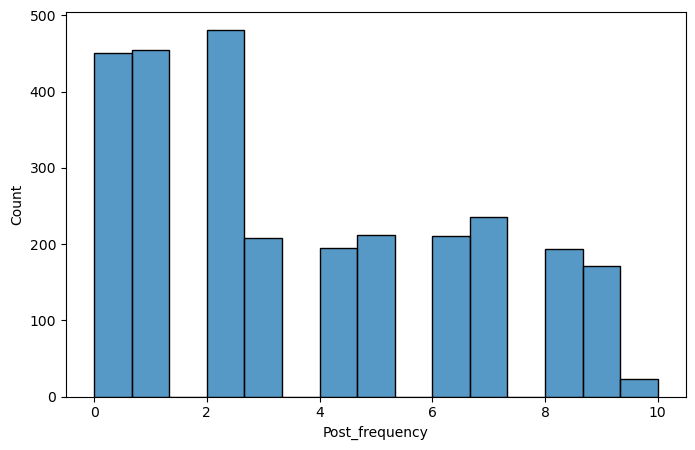

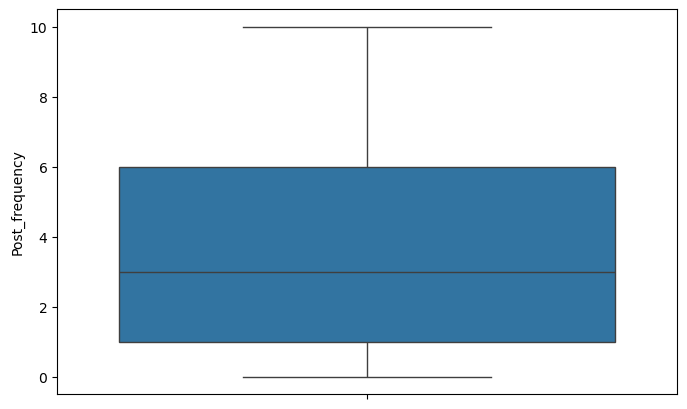

Its Positively skewed
Its pleutykurtic
{'missing': 65, 'min': 0.0, 'max': 10.0, 'mean': 3.56, 'median': 3.0, 'mode': 2.0, 'var': 8.56, 'std': 2.93, 'range': 10.0, 'q1': 1.0, 'q3': 6.0, 'skew': 0.47, 'kurt': -1.08}

--- Analysis for: Personality ---


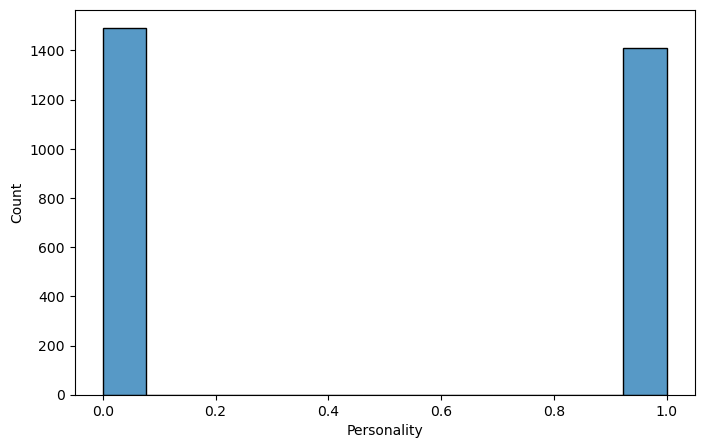

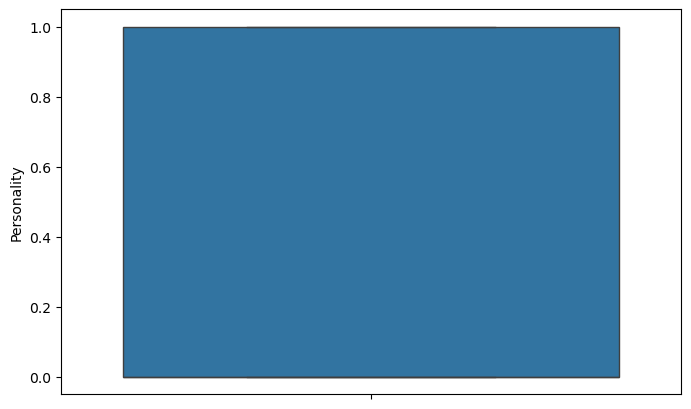

Its Positively skewed
Its pleutykurtic
{'missing': 0, 'min': 0, 'max': 1, 'mean': 0.49, 'median': 0.0, 'mode': 0, 'var': 0.25, 'std': 0.5, 'range': 1, 'q1': 0.0, 'q3': 1.0, 'skew': 0.06, 'kurt': -2.0}


In [43]:
for col in cols:
    print(f"\n--- Analysis for: {col} ---")
    result = univariate_num(data=df_clean, x=col)
    print(result)

In [45]:
for col in df_clean:
    skew_value = df_clean[col].skew()
    if abs(skew_value) < 0.5:
        skew_type = "Approximately Normal"
    elif skew_value > 0:
        skew_type = "Positively Skewed"
    else:
        skew_type = "Negatively Skewed"
    
    print(f"{col}: Skewness = {round(skew_value, 2)} → {skew_type}\n")

Time_spent_Alone: Skewness = 0.39 → Approximately Normal

Stage_fear: Skewness = 0.0 → Approximately Normal

Social_event_attendance: Skewness = 0.29 → Approximately Normal

Going_outside: Skewness = 0.19 → Approximately Normal

Drained_after_socializing: Skewness = 0.02 → Approximately Normal

Friends_circle_size: Skewness = 0.43 → Approximately Normal

Post_frequency: Skewness = 0.47 → Approximately Normal

Personality: Skewness = 0.06 → Approximately Normal



In [47]:
# Columns with positively skewed is normalised with median()
# Columns with negatively skewed is normalised with mean()

# If you use the mean  to fill missing values here, you'll heavily distort your data.
# If you use the median, you preserve the underlying distribution better.

for col in df_clean:
    skewness = df_clean[col].skew()
    if abs(skewness) > 1:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
    else:
        df_clean[col].fillna(df_clean[col].mean(), inplace=True)

In [49]:
df_clean.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [51]:
df_clean.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,1
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,1
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,0


In [53]:
# Impute missing numerical and binary categorical data
imputer = SimpleImputer(strategy='mean')
df_clean[df_clean.columns] = imputer.fit_transform(df_clean)

In [55]:
correlation = df_clean.corr()
target_corr = correlation['Personality'].sort_values(ascending=False)
target_corr

Personality                  1.000000
Drained_after_socializing    0.858766
Stage_fear                   0.854901
Time_spent_Alone             0.712468
Friends_circle_size         -0.687203
Post_frequency              -0.721062
Social_event_attendance     -0.721520
Going_outside               -0.739251
Name: Personality, dtype: float64

In [57]:
# Split into features and target
X = df_clean.drop(columns='Personality')
y = df_clean['Personality']

from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)

In [59]:
# Split into features and target
X = df_clean.drop(columns='Personality')
y = df_clean['Personality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2320, 7), (580, 7), (2320,), (580,))

In [61]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



In [63]:
# Encode test target for metric compatibility

y_test_encoded = y_test  # Already numeric (0/1)

In [65]:
# K-Means Clustering (unsupervised)

# Fit K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Evaluate both possible label mappings
acc1 = accuracy_score(y, cluster_labels)
acc2 = accuracy_score(y, 1 - cluster_labels)

# Best possible match
kmeans_accuracy = max(acc1, acc2)
print("Best K-Means Cluster Accuracy:", kmeans_accuracy)


Best K-Means Cluster Accuracy: 0.9341379310344827


In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

plt.style.use('ggplot')

In [71]:
# Build the model
model1 = Sequential()

# Input layer + 1st hidden layer
model1.add(Dense(units=100, activation='relu', kernel_initializer='he_uniform', input_shape=[X_train.shape[1]]))
model1.add(Dropout(0.3))  

# 2nd hidden layer
model1.add(Dense(units=60, activation='relu', kernel_initializer='he_uniform'))

# 3rd hidden layer
model1.add(Dense(units=80, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.3))  # Optional

# 4th hidden layer
model1.add(Dense(units=90, activation='relu', kernel_initializer='he_uniform'))

# 5th hidden layer
model1.add(Dense(units=100, activation='relu', kernel_initializer='he_uniform'))

# Output layer (binary classification)
model1.add(Dense(units=1, activation='sigmoid'))  # Binary: sigmoid

# Compile model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with early stopping
history1 = model1.fit(
    X_train, y_train,
    batch_size=64,
    epochs=100,
    validation_split=0.1,
    shuffle=True,
    verbose=1
)



Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7519 - loss: 0.7858 - val_accuracy: 0.9569 - val_loss: 0.2477
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8675 - loss: 0.4587 - val_accuracy: 0.9569 - val_loss: 0.2323
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8949 - loss: 0.3786 - val_accuracy: 0.9569 - val_loss: 0.2326
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9091 - loss: 0.3299 - val_accuracy: 0.9569 - val_loss: 0.2320
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9161 - loss: 0.3605 - val_accuracy: 0.9569 - val_loss: 0.2334
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9248 - loss: 0.3101 - val_accuracy: 0.9569 - val_loss: 0.2773
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9247 - loss: 0.3060 - val_accuracy: 0.9569 - val_loss: 0.2632
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9323 - loss: 0.3096 - val_accuracy: 0.9569 - v

In [74]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │           6,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │           4,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 90)                  │           7,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │           9,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,695 (330.84 KB)

 Trainable params: 28,231 (110.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56,464 (220.57 KB)

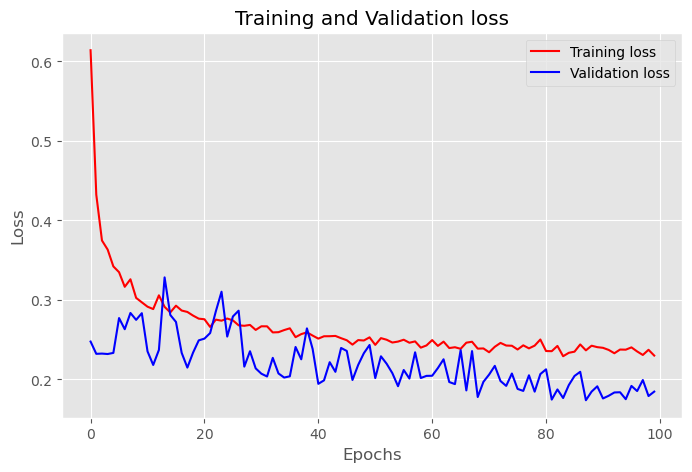

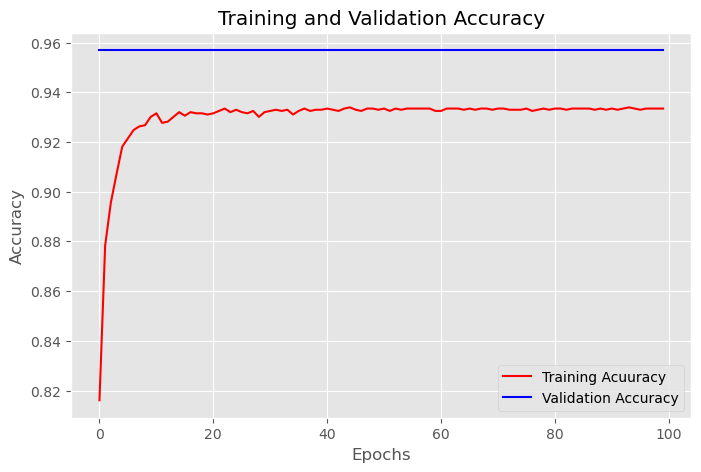

In [76]:
history_dict1 = history1.history

acc1 = history_dict1['accuracy']
val_acc1 = history_dict1['val_accuracy']
loss1 = history_dict1['loss']
val_loss1 = history_dict1['val_loss']
epochs1 = history1.epoch


# VIsulaise the Train and Validation set with their lliss and accuracy

# Training and Validation loss curves

plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Training and Validation loss curves


plt.plot(epochs1, acc1, 'r', label='Training Acuuracy')
plt.plot(epochs1, val_acc1, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop

early_stop = EarlyStopping(
    monitor='val_accuracy',  # or 'val_loss' if preferred
    patience=10,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=5,
    verbose=1,
    min_lr=1e-6
)

model2 = Sequential()

# Input + hidden layers with changes
model2.add(Dense(128, activation='tanh', kernel_initializer='he_uniform', input_shape=[X_train.shape[1]]))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))

model2.add(Dense(64, activation='tanh', kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(32, activation='tanh', kernel_initializer='he_uniform'))
model2.add(Dropout(0.2))

# Output layer
model2.add(Dense(1, activation='sigmoid'))

# Compile with a different optimizer
model2.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history2 = model2.fit(
    X_train, y_train,
    batch_size=64,
    epochs=100,
    validation_split=0.1,
    shuffle=True,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7783 - loss: 0.5064 - val_accuracy: 0.9569 - val_loss: 0.2025 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9328 - loss: 0.2718 - val_accuracy: 0.9569 - val_loss: 0.1820 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9405 - loss: 0.2512 - val_accuracy: 0.9569 - val_loss: 0.1702 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9327 - loss: 0.2641 - val_accuracy: 0.9569 - val_loss: 0.1630 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9319 - loss: 0.2513 - val_accuracy: 0.9569 - val_loss: 0.1625 - learning_rate: 0.0010
Epoch 6/100
26/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9304 - loss: 0.2612 
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9307 - loss: 0.2594 - val_acc

In [79]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,940 (93.52 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 11,779 (46.02 KB)

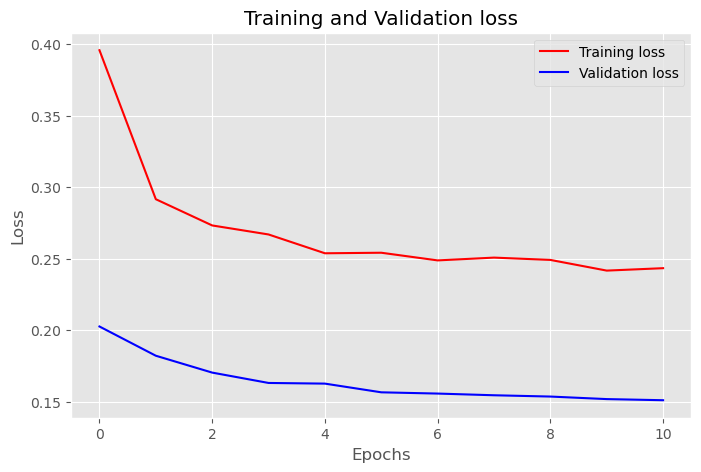

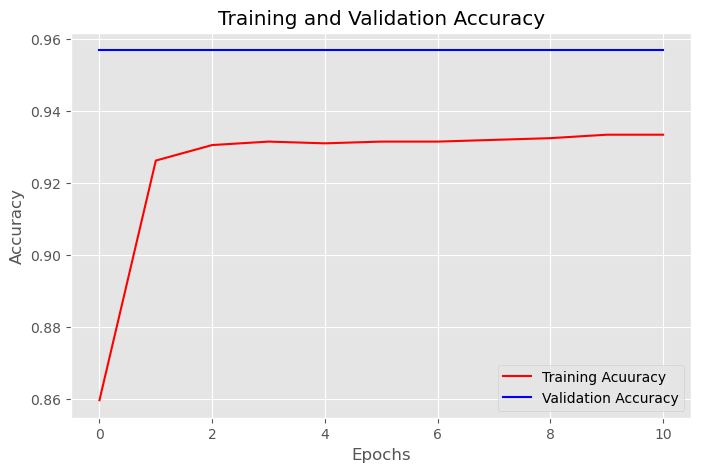

In [82]:
history_dict2 = history2.history

acc2 = history_dict2['accuracy']
val_acc2 = history_dict2['val_accuracy']
loss2 = history_dict2['loss']
val_loss2 = history_dict2['val_loss']
epochs2 = history2.epoch


# VIsulaise the Train and Validation set with their lliss and accuracy

# Training and Validation loss curves

plt.plot(epochs2, loss2, 'r', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Training and Validation loss curves


plt.plot(epochs2, acc2, 'r', label='Training Acuuracy')
plt.plot(epochs2, val_acc2, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
# Evaluation
print('Tested result for all epochs\n')
validation_loss1, validation_acc1 = model1.evaluate(X_test,y_test)
print('Validation loss:',validation_loss1,'\t Validation accuracy:',validation_acc1)


Tested result for all epochs

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9311 - loss: 0.2496 
Validation loss: 0.2569388747215271 	 Validation accuracy: 0.9293103218078613


In [86]:
print('Tested result for Early Stopping and ReduceLROnPlateau \n')

validation_loss2, validation_acc2 = model2.evaluate(X_test,y_test)
print('Validation loss:',validation_loss2,'\t Validation accuracy:',validation_acc2)

Tested result for Early Stopping and ReduceLROnPlateau 

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9311 - loss: 0.2781 
Validation loss: 0.282678484916687 	 Validation accuracy: 0.9293103218078613


In [88]:
pred1 = model1.predict(X_test)

binary_predictions1=[]

for i in pred1:
    if i>=0.5:
        binary_predictions1.append(1)
    else:
        binary_predictions1.append(0)

pred2 = model2.predict(X_test)

binary_predictions2=[]

for i in pred2:
    if i>=0.5:
        binary_predictions2.append(1)
    else:
        binary_predictions2.append(0)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [90]:
print('Performance metrics of model1:\n')


print('Accuraacy on testing set :',accuracy_score(binary_predictions1,y_test))
print('Precision on testing set:',precision_score(binary_predictions1,y_test))
print('Recall on testing set :',recall_score(binary_predictions1,y_test))


print('\nPerformance metrics of model2:\n')

print('Accuraacy on testing set :',accuracy_score(binary_predictions2,y_test))
print('Precision on testing set:',precision_score(binary_predictions2,y_test))
print('Recall on testing set :',recall_score(binary_predictions2,y_test))

Performance metrics of model1:

Accuraacy on testing set : 0.9293103448275862
Precision on testing set: 0.9388489208633094
Recall on testing set : 0.9157894736842105

Performance metrics of model2:

Accuraacy on testing set : 0.9293103448275862
Precision on testing set: 0.9388489208633094
Recall on testing set : 0.9157894736842105


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

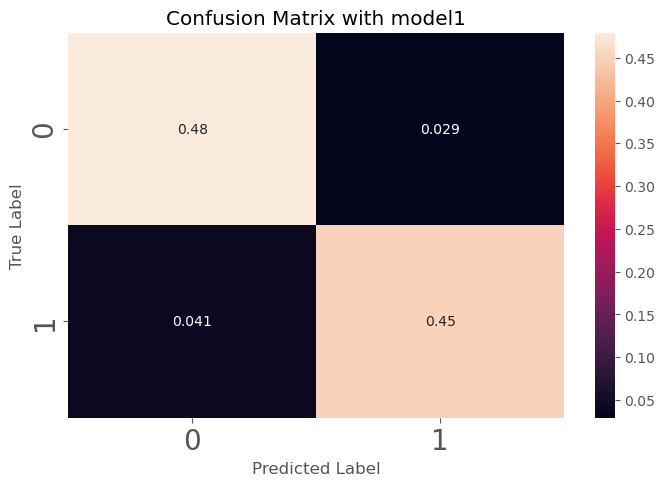

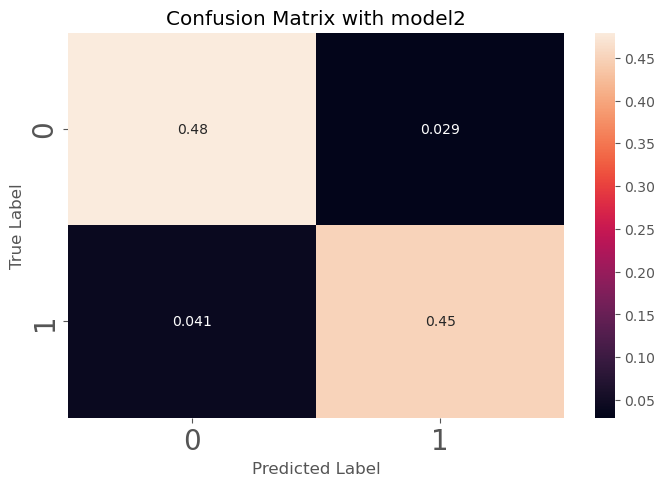

In [94]:
# COnfusion Matrix

from sklearn.metrics import confusion_matrix


matrix1 = confusion_matrix(binary_predictions1,y_test,normalize='all')
plt.figure(figsize=(8,5))
ax=plt.subplot()
sns.heatmap(matrix1,annot=True,ax=ax)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix with model1')
ax.xaxis.set_ticklabels([0,1],size=20)
ax.yaxis.set_ticklabels([0,1],size=20)


matrix2 = confusion_matrix(binary_predictions2,y_test,normalize='all')
plt.figure(figsize=(8,5))
ax=plt.subplot()
sns.heatmap(matrix2,annot=True,ax=ax)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix with model2')
ax.xaxis.set_ticklabels([0,1],size=20)
ax.yaxis.set_ticklabels([0,1],size=20)

In [96]:
# Instantiate models
# Dictionary to store models and results

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}

results = []

# Evaluate traditional models
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='f1')

    results.append({
        'Model': name,
        'Accuracy': metrics.accuracy_score(y_test_encoded, y_pred),
        'Precision': metrics.precision_score(y_test_encoded, y_pred),
        'Recall': metrics.recall_score(y_test_encoded, y_pred),
        'F1 Score': metrics.f1_score(y_test_encoded, y_pred),
        'CV-Score': f"{cv_scores.mean():.3f} ± {cv_scores.std():.3f}"
    })

# Add ANN model1
results.append({
    'Model': 'ANN Model 1',
    'Accuracy': metrics.accuracy_score(y_test, binary_predictions1),
    'Precision': metrics.precision_score(y_test, binary_predictions1),
    'Recall': metrics.recall_score(y_test, binary_predictions1),
    'F1 Score': metrics.f1_score(y_test, binary_predictions1),
    'CV-Score': 'N/A'
})

# Add ANN model2
results.append({
    'Model': 'ANN Model 2',
    'Accuracy': metrics.accuracy_score(y_test, binary_predictions2),
    'Precision': metrics.precision_score(y_test, binary_predictions2),
    'Recall': metrics.recall_score(y_test, binary_predictions2),
    'F1 Score': metrics.f1_score(y_test, binary_predictions2),
    'CV-Score': 'N/A'
})

# Display all results
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,CV-Score
0,Logistic Regression,0.929310,0.915789,0.938849,0.927176,0.937 ± 0.012
1,Decision Tree,0.874138,0.864769,0.874101,0.869410,0.876 ± 0.025
2,Random Forest,0.918966,0.911032,0.920863,0.915921,0.922 ± 0.020
3,SVM,0.929310,0.915789,0.938849,0.927176,0.937 ± 0.012
4,AdaBoost,0.920690,0.900000,0.938849,0.919014,0.933 ± 0.012
5,XGBoost,0.913793,0.893103,0.931655,0.911972,0.923 ± 0.014
6,ANN Model 1,0.929310,0.915789,0.938849,0.927176,N/A
7,ANN Model 2,0.929310,0.915789,0.938849,0.927176,N/A


In [97]:
results_df.sort_values(by='F1 Score', ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score,CV-Score
0,Logistic Regression,0.929310,0.915789,0.938849,0.927176,0.937 ± 0.012
3,SVM,0.929310,0.915789,0.938849,0.927176,0.937 ± 0.012
6,ANN Model 1,0.929310,0.915789,0.938849,0.927176,N/A
7,ANN Model 2,0.929310,0.915789,0.938849,0.927176,N/A
4,AdaBoost,0.920690,0.900000,0.938849,0.919014,0.933 ± 0.012
2,Random Forest,0.918966,0.911032,0.920863,0.915921,0.922 ± 0.020
5,XGBoost,0.913793,0.893103,0.931655,0.911972,0.923 ± 0.014
1,Decision Tree,0.874138,0.864769,0.874101,0.869410,0.876 ± 0.025


Classification Report:

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       302
         1.0       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580


Confusion Matrix:
[[278  24]
 [ 17 261]]


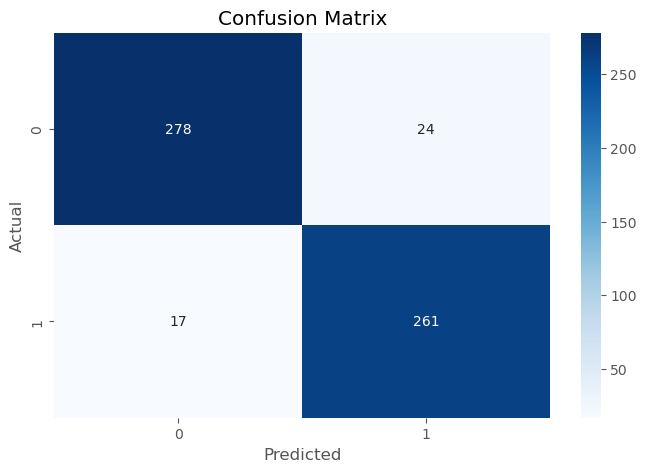

In [100]:
# Testing the model using samples in test data

best_model = LogisticRegression()
best_model.fit(X_train_smote, y_train_smote)
y_pred = best_model.predict(X_test)



from sklearn.metrics import classification_report, confusion_matrix


print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [102]:
df_clean.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,0.0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,1.0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,0.0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,0.0


In [104]:
# Sample input (update these values as needed)
sample = np.array([[9.0,1.0,0.0,0.0,1.0,0.0,3.0]])  # Must match X no of columns 1->Introvert, 0->Extrovert
sample_df = pd.DataFrame(sample, columns=X.columns)
sample_df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

In [106]:
# Predict
prediction = best_model.predict(sample_df)

# Ensure prediction is integer for inverse transform
prediction = prediction.astype(int)
label = label_encoder.inverse_transform(prediction)

print("Predicted Personality:", label[0])


Predicted Personality: Introvert


In [108]:
best_model = RandomForestClassifier()
best_model.fit(X_train_smote, y_train_smote)
y_pred = best_model.predict(X_test)

# Sample input (update these values as needed)
sample = np.array([[4.0,0.0,4.0,6.0,0.0,13.0,5.0]])  # Must match X no of columns 1->Introvert, 0->Extrovert
sample_df = pd.DataFrame(sample, columns=X.columns)
sample_df.columns

# Predict
prediction = best_model.predict(sample_df)

# Ensure prediction is integer for inverse transform
prediction = prediction.astype(int)
label = label_encoder.inverse_transform(prediction)

print("Predicted Personality:", label[0])


Predicted Personality: Extrovert
